<a href="https://colab.research.google.com/github/Kyrillos1/Gausian-Task/blob/main/gaussian_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
plt.style.use('seaborn-darkgrid')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"Data has {train.shape[0]} Rows and {train.shape[1]} Features")
train.head()

Data has 891 Rows and 12 Features


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [ ]:
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)

In [ ]:
train.drop(['Name'],axis=1, inplace=True)
train.drop(['Ticket'],axis=1, inplace=True)

test.drop(['Name'],axis=1, inplace=True)
test.drop(['Ticket'],axis=1, inplace=True)

In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
train.drop(['Cabin'],axis=1, inplace=True)
modeOfEmbarked = train['Embarked'].mode()[0]
train['Embarked'].fillna(modeOfEmbarked,inplace=True)
meanOfAge = train['Age'].mean()
train['Age'].fillna(meanOfAge,inplace=True)

test.drop(['Cabin'],axis=1, inplace=True)
modeOfEmbarked = test['Embarked'].mode()[0]
test['Embarked'].fillna(modeOfEmbarked,inplace=True)
meanOfAge = test['Age'].mean()
test['Age'].fillna(meanOfAge,inplace=True)

test.loc[test['Parch']>6,'Parch']=6
meanOfFare = test['Fare'].mean()
test['Fare'].fillna(meanOfAge,inplace=True)

In [ ]:
for i in train:
    #print(i)
    if train[i].nunique()==2:
        train[i]=pd.get_dummies(train[i], drop_first=True, prefix=str(i))
    if i=='Embarked':
        train = pd.concat([train.drop([i], axis=1), pd.DataFrame(pd.get_dummies(train[i], drop_first=True, prefix=str(i)))],axis=1)
for i in test:
    #print(i)
    if test[i].nunique()==2:
        test[i]=pd.get_dummies(test[i], drop_first=True, prefix=str(i))
    if i=='Embarked':
        test = pd.concat([test.drop([i], axis=1), pd.DataFrame(pd.get_dummies(test[i], drop_first=True, prefix=str(i)))],axis=1)
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [ ]:
for i in train:
  print(i)

Survived
Pclass
Sex
Age
SibSp
Parch
Fare
Embarked_Q
Embarked_S


In [ ]:
print(train.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


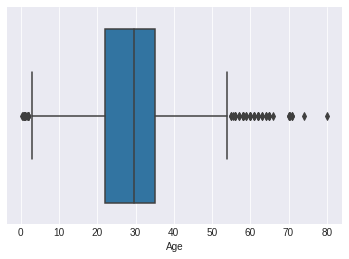

In [ ]:
sns.boxplot(train['Age'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


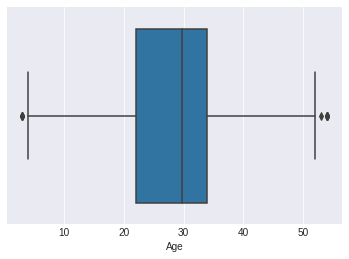

In [ ]:
Q3=train['Age'].quantile(0.75) 
Q1=train['Age'].quantile(0.25)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
train.drop(train[train['Age'] < lower].index | train[train['Age'] >upper].index, inplace = True)
sns.boxplot(train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


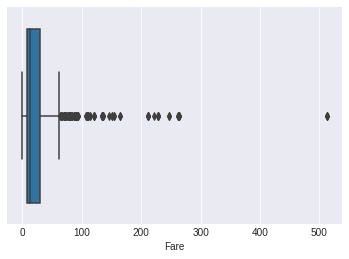

In [ ]:
sns.boxplot(train['Fare'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


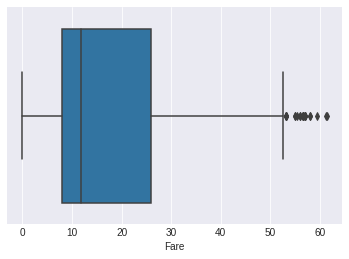

In [ ]:
q3=train['Fare'].quantile(0.75) 
q1=train['Fare'].quantile(0.25)
IqR=q3-q1
Lower=q1-(1.5*IqR)
Upper=q3+(1.5*IqR)
train.drop(train[train['Fare'] < Lower].index | train[train['Fare'] >Upper].index, inplace = True)
sns.boxplot(train['Fare'])

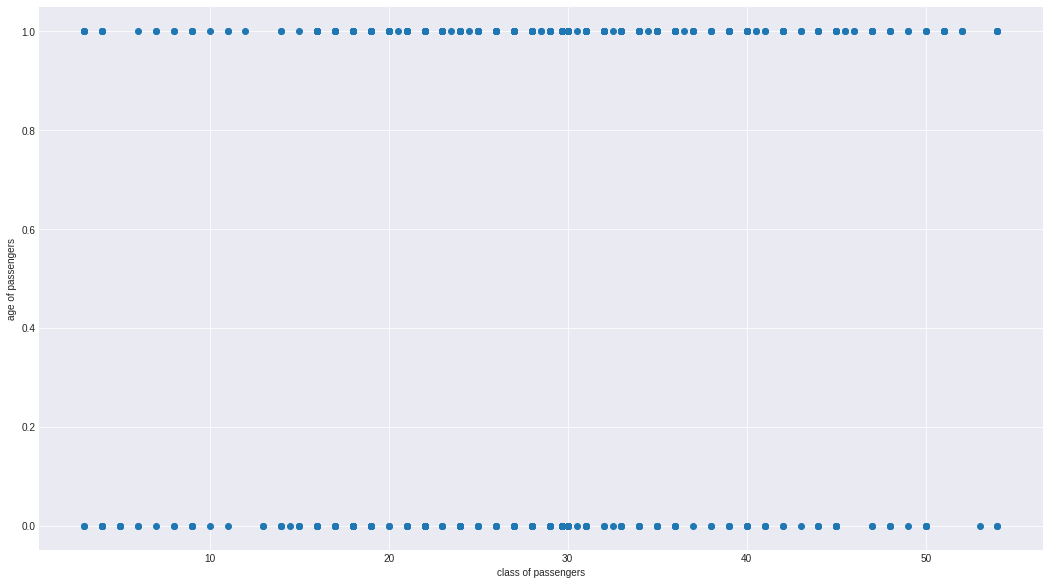

In [ ]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(train['Age'], train['Sex'])
# x-axis label
ax.set_xlabel('class of passengers')
 
# y-axis label
ax.set_ylabel('age of passengers')
plt.show()

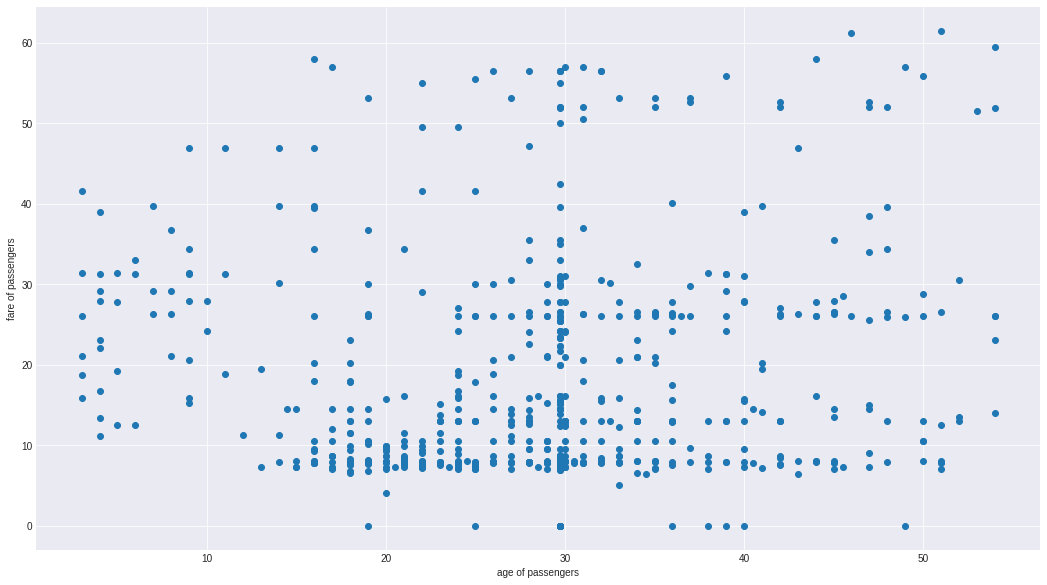

In [ ]:

fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(train['Age'], train['Fare'])
# x-axis label
ax.set_xlabel('age of passengers')
 
# y-axis label
ax.set_ylabel('fare of passengers')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram Of Age')

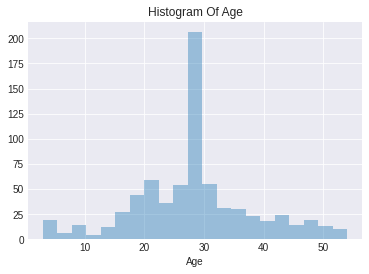

In [ ]:
sns.distplot(train['Age'],kde=False).set_title("Histogram Of Age")

In [ ]:
train.drop_duplicates(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    615 non-null    uint8  
 1   Pclass      615 non-null    int64  
 2   Sex         615 non-null    uint8  
 3   Age         615 non-null    float64
 4   SibSp       615 non-null    int64  
 5   Parch       615 non-null    int64  
 6   Fare        615 non-null    float64
 7   Embarked_Q  615 non-null    uint8  
 8   Embarked_S  615 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 31.2 KB


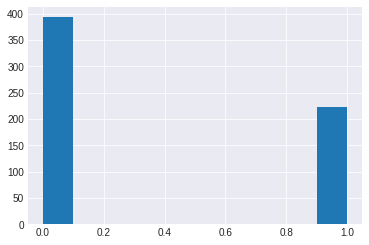

In [ ]:
train["Survived"].hist()

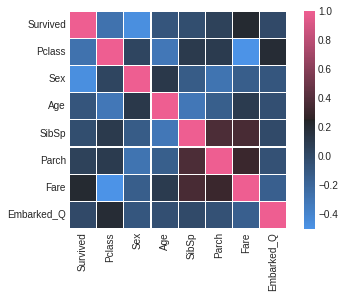

In [ ]:
corr=train.iloc[:,:-1].corr(method="pearson")
cmap=sns.diverging_palette(250,354,80,60,center="dark",as_cmap=True)
sns.heatmap(corr,vmax=1,vmin=-.5,cmap=cmap,square=True,linewidths=.2)

In [ ]:
#train=train[["Age","Survived","Fare"]]
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0,1
3,1,3,0,26.000000,0,0,7.9250,0,1
4,1,1,0,35.000000,1,0,53.1000,0,1
5,0,3,1,35.000000,0,0,8.0500,0,1
6,0,3,1,29.699118,0,0,8.4583,1,0
7,0,1,1,54.000000,0,0,51.8625,0,1
9,1,3,0,27.000000,0,2,11.1333,0,1
10,1,2,0,14.000000,1,0,30.0708,0,0
11,1,3,0,4.000000,1,1,16.7000,0,1


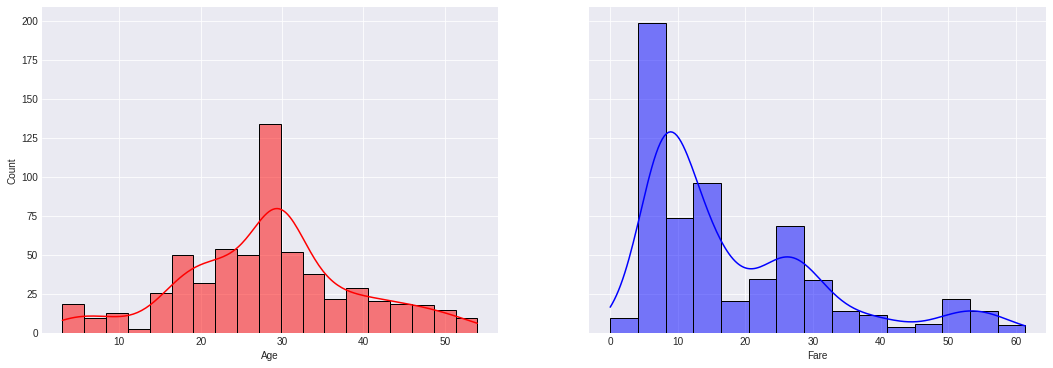

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(18,6),sharey=True)
sns.histplot(train,ax=axes[0],x="Age",kde=True,color="red")
sns.histplot(train,ax=axes[1],x="Fare",kde=True,color="blue")


In [ ]:
# def calculate_prior(df,y):
#   classes=sorted(list(df[y].unique()))
#   prior=[]
#   for i in classes:
#     prior.append(len(df[df[y]]==i)/len(df))
#     return prior

In [ ]:
# def calculate_likelihood_gaussian(df,feat_name,feat_val,y,label):
#   feat=list(df.columns)
#   df=df[df[y]==label]
#   mean,std=df[feat_name].mean(),df[feat_name].std()
#   p_x_given_y=(1/(np.sqrt(2*np.pi)*std))* np.exp(-((feat_val-mean)**2 /(2*std**2)))
#   return p_x_given_y

In [ ]:
# def naive_bayes_gaussian(df,x,y):
#   features=list(df.columns)[:-1]
#   prior=calculate_prior(df,y)
#   y_pred=[]
#   for X in x:
#     labels=sorted(list(df[y].unique()))
#     likelihood=[1]*len(labels)
#     for j in range(len(labels)):
#       for i in range(len(features)):
#         likelihood[j]*=calculate_likelihood_gaussian(df,features[i],X[i],y,labels[j])
#     post_prob=[1]*len(labels)
#     for j in range(len(labels)):
#       post_prob[j]=likelihood[j]*prior[j]
#       y_pred.append(np.argmax(post_prob))
#   return np.array(y_pred)
    

In [ ]:
# from sklearn.model_selection import train_test_split
# train,test=train_test_split(train,test_size=.2,random_state=41)
# x_test=test.iloc[:,:-1].values
# y_test=test.iloc[:,:-1].values
# y_pred=naive_bayes_gaussian(train,x_test,y_test)
# print(y_pred)
# y_pred.reshape(-1,1)
# submission=pd.DataFrame(y_pred)
# submission.to_csv('gender_submission.csv')


In [ ]:
import time
class GaussianNaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        # calculating the mean, variance and prior P(H) for each class
        for i, c in enumerate(self._classes):
            X_for_class_c = X[y==c]
            self._mean[i, :] = X_for_class_c.mean(axis=0)
            self._var[i, :] = X_for_class_c.var(axis=0)
            self._priors[i] = X_for_class_c.shape[0] / float(n_samples) 

    def _calculate_likelihood(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        num = np.exp(- (x-mean)**2 / (2 * var))
        denom = np.sqrt(2 * np.pi * var)
        return num / denom 
    def predict(self, X):
        y_pred = [self._classify_sample(x) for x in X]
        return np.array(y_pred)

    def _classify_sample(self, x):
        posteriors = []
        # calculating posterior probability for each class
        for i, c in enumerate(self._classes):
            prior = np.log(self._priors[i])
            posterior = np.sum(np.log(self._calculate_likelihood(i, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        # return the class with highest posterior probability
        return self._classes[np.argmax(posteriors)] 

In [ ]:
X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values
X_test = test.iloc[:,:].values

start = time.perf_counter()
nb = GaussianNaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
end = time.perf_counter()

print(f'Finished in {round(end-start, 3)} second(s)')  
predictions.reshape(-1,1)
submission=pd.DataFrame(predictions)
submission.to_csv('gender_submission.csv')

Finished in 0.03 second(s)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
